In [1]:
import duckdb as db
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

Primeiramente vamos analisar o dataset e obter algumas informações dele

In [2]:
# Obs: também é possível ler direto csv com o duckdb
# db.read_csv('netflix.csv')

In [3]:
# Cria a tabela netflix caso não exista
db.sql("CREATE TABLE IF NOT EXISTS netflix AS SELECT * FROM read_csv('netflix.csv');")

In [4]:
# db.sql("DROP TABLE netflix")

In [5]:
db.sql("SELECT * FROM netflix LIMIT 10")

┌─────────┬──────────┬─────────┬───┬─────────┬───────────┬──────────────────────┬──────────────────────┐
│ Show_Id │ Category │  Title  │ … │ Rating  │ Duration  │         Type         │     Description      │
│ varchar │ varchar  │ varchar │   │ varchar │  varchar  │       varchar        │       varchar        │
├─────────┼──────────┼─────────┼───┼─────────┼───────────┼──────────────────────┼──────────────────────┤
│ s1      │ TV Show  │ 3%      │ … │ TV-MA   │ 4 Seasons │ International TV S…  │ In a future where …  │
│ s2      │ Movie    │ 07:19   │ … │ TV-MA   │ 93 min    │ Dramas, Internatio…  │ After a devastatin…  │
│ s3      │ Movie    │ 23:59   │ … │ R       │ 78 min    │ Horror Movies, Int…  │ When an army recru…  │
│ s4      │ Movie    │ 9       │ … │ PG-13   │ 80 min    │ Action & Adventure…  │ In a postapocalypt…  │
│ s5      │ Movie    │ 21      │ … │ PG-13   │ 123 min   │ Dramas               │ A brilliant group …  │
│ s6      │ TV Show  │ 46      │ … │ TV-MA   │ 1 Season

In [6]:
# Verificando quantas linhas temos em nosso dataset
qtd = db.sql("SELECT COUNT(*) FROM netflix").fetchall()[0][0]
print(f"O dataset possui {qtd} linhas")

O dataset possui 7789 linhas


In [7]:
db.sql("DESCRIBE netflix")

┌──────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│ column_name  │ column_type │  null   │   key   │ default │  extra  │
│   varchar    │   varchar   │ varchar │ varchar │ varchar │ varchar │
├──────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ Show_Id      │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Category     │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Title        │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Director     │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Cast         │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Country      │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Release_Date │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Rating       │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Duration     │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Type         │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ Desc

Analisando melhor com pandas

In [8]:
df_netflix = db.sql("SELECT * FROM netflix").df()

In [9]:
# Verificando as colunas
df_netflix.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Dicionario dos dados

| Coluna       | Descrição                                                |
|--------------|----------------------------------------------------------|
| Show_Id      | Identificador único de cada show na Netflix.            |
| Category     | Categoria do show (por exemplo, filme, série de TV, etc.)|
| Title        | Título do show.                                          |
| Director     | Diretor do show (se aplicável).                          |
| Cast         | Elenco do show.                                          |
| Country      | País de origem do show.                                  |
| Release_Date | Data de lançamento do show na Netflix.                   |
| Rating       | Classificação etária do show.                            |
| Duration     | Duração do show (por exemplo, número de temporadas para uma série de TV ou duração de um filme). |
| Type         | Tipo do show (por exemplo, se é um filme ou uma série de TV). |
| Description  | Descrição ou sinopse do show.     

In [10]:
# Fazendo as verificações no dataset
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [11]:
df_netflix.describe().T

,count,unique,top,freq
Show_Id,7789,7787,s6621,2
Category,7789,2,Movie,5379
Title,7789,7787,The Lost Okoroshi,2
Director,5401,4050,"Raúl Campos, Jan Suter",18
Cast,7071,6831,David Attenborough,18
Country,7282,681,United States,2556
Release_Date,7779,1565,"January 1, 2020",118
Rating,7782,14,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334


In [12]:
print("Quantidade de valor nulo por colunas")
df_netflix.isnull().sum()

Quantidade de valor nulo por colunas


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Logo podemos ver que, existem valores que são duplicados e que nas colunas de "Director", "Cast", "Country", "Release_Date" e "Rating" possuimos valores duplicados.

In [13]:
# Verificando duplicações
print("Valores duplicados por colunas")
df_netflix.apply(lambda x: x.duplicated().sum())

Valores duplicados por colunas


Show_Id            2
Category        7787
Title              2
Director        3738
Cast             957
Country         7107
Release_Date    6223
Rating          7774
Duration        7573
Type            7297
Description       20
dtype: int64

In [14]:
# Analisando a show_Id pelo sql
db.sql(""" 
       SELECT 
            Show_Id, 
            COUNT(*) 
       FROM netflix 
       GROUP BY Show_ID 
       HAVING COUNT(*) > 1""")

┌─────────┬──────────────┐
│ Show_Id │ count_star() │
│ varchar │    int64     │
├─────────┼──────────────┤
│ s684    │            2 │
│ s6621   │            2 │
└─────────┴──────────────┘

In [15]:
db.sql("""
       SELECT 
            *
        FROM netflix
        WHERE Show_id = 's684'
        """)

┌─────────┬──────────┬──────────┬─────────────┬───┬─────────┬──────────┬──────────────────────┬──────────────────────┐
│ Show_Id │ Category │  Title   │  Director   │ … │ Rating  │ Duration │         Type         │     Description      │
│ varchar │ varchar  │ varchar  │   varchar   │   │ varchar │ varchar  │       varchar        │       varchar        │
├─────────┼──────────┼──────────┼─────────────┼───┼─────────┼──────────┼──────────────────────┼──────────────────────┤
│ s684    │ Movie    │ Backfire │ Dave Patten │ … │ TV-MA   │ 97 min   │ Dramas, Independen…  │ When two would-be …  │
│ s684    │ Movie    │ Backfire │ Dave Patten │ … │ TV-MA   │ 97 min   │ Dramas, Independen…  │ When two would-be …  │
├─────────┴──────────┴──────────┴─────────────┴───┴─────────┴──────────┴──────────────────────┴──────────────────────┤
│ 2 rows                                                                                        11 columns (8 shown) │
└───────────────────────────────────────────────

In [16]:
# Fazendo o mesmo código pelo pandas
df_netflix[df_netflix['Show_Id'].duplicated()]['Show_Id']

6300     s684
6622    s6621
Name: Show_Id, dtype: object

Fazendo o tratamento no banco para remover as duplicadas com mesmo id

In [17]:
# Função do duckdb que retira as linhas duplicadas no select
db.sql(""" 
        SELECT * FROM netflix
        WHERE Show_id = 's684'
        QUALIFY row_number() over (partition by Show_iD ) = 1
        """)

┌─────────┬──────────┬──────────┬─────────────┬───┬─────────┬──────────┬──────────────────────┬──────────────────────┐
│ Show_Id │ Category │  Title   │  Director   │ … │ Rating  │ Duration │         Type         │     Description      │
│ varchar │ varchar  │ varchar  │   varchar   │   │ varchar │ varchar  │       varchar        │       varchar        │
├─────────┼──────────┼──────────┼─────────────┼───┼─────────┼──────────┼──────────────────────┼──────────────────────┤
│ s684    │ Movie    │ Backfire │ Dave Patten │ … │ TV-MA   │ 97 min   │ Dramas, Independen…  │ When two would-be …  │
├─────────┴──────────┴──────────┴─────────────┴───┴─────────┴──────────┴──────────────────────┴──────────────────────┤
│ 1 rows                                                                                        11 columns (8 shown) │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [18]:
# Fazendo a substituição da tabela com a linha cima
db.sql(""" 
       CREATE OR REPLACE TABLE netflix AS
        (
            SELECT * FROM netflix
            QUALIFY row_number() over (partition by Show_iD ) = 1
        )
        """)

In [19]:
# Verificando
db.sql("""
       SELECT 
            *
        FROM netflix
        WHERE Show_id = 's684'
        """)

┌─────────┬──────────┬──────────┬─────────────┬───┬─────────┬──────────┬──────────────────────┬──────────────────────┐
│ Show_Id │ Category │  Title   │  Director   │ … │ Rating  │ Duration │         Type         │     Description      │
│ varchar │ varchar  │ varchar  │   varchar   │   │ varchar │ varchar  │       varchar        │       varchar        │
├─────────┼──────────┼──────────┼─────────────┼───┼─────────┼──────────┼──────────────────────┼──────────────────────┤
│ s684    │ Movie    │ Backfire │ Dave Patten │ … │ TV-MA   │ 97 min   │ Dramas, Independen…  │ When two would-be …  │
├─────────┴──────────┴──────────┴─────────────┴───┴─────────┴──────────┴──────────────────────┴──────────────────────┤
│ 1 rows                                                                                        11 columns (8 shown) │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [20]:
# Dando uma olhada na tabela
db.sql("SELECT COUNT(*) AS QuantidadeLinhas FROM netflix")

┌──────────────────┐
│ QuantidadeLinhas │
│      int64       │
├──────────────────┤
│             7787 │
└──────────────────┘

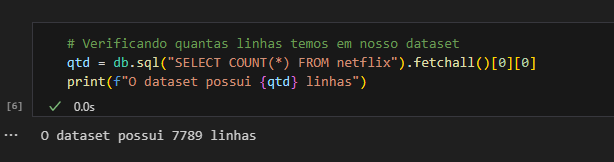

Comparando com a quantidade anterior podemos verificar que a quantidade de linhas duplicadas foi removida com sucesso

Outro ponto, vemos que o Release_Date mostra a data completa, sem formatação, como visto abaixo, logo vamos fazer uma formatação na tabela para uma melhor manipulação.

In [21]:
# Caso alguém tenha interesse em saber mais sobre formatação de data no duckdb:
# https://duckdb.org/docs/sql/functions/dateformat.html

db.sql("SELECT Release_Date, CAST(strptime(Release_Date, '%B %d, %Y') AS DATE) AS Date FROM netflix LIMIT 5")

┌─────────────────┬────────────┐
│  Release_Date   │    Date    │
│     varchar     │    date    │
├─────────────────┼────────────┤
│ January 8, 2021 │ 2021-01-08 │
│ March 21, 2019  │ 2019-03-21 │
│ June 15, 2019   │ 2019-06-15 │
│ April 18, 2019  │ 2019-04-18 │
│ April 8, 2020   │ 2020-04-08 │
└─────────────────┴────────────┘

In [22]:
# Alterando a coluna de data
db.sql("""
       UPDATE netflix
       SET Release_date = CAST(strptime(Release_Date, '%B %d, %Y') AS DATE);
       ALTER TABLE netflix
       ALTER Release_date TYPE DATE;
       """)

In [23]:
# Adicionando uma coluna de ano
db.sql("""
       ALTER TABLE netflix
       ADD COLUMN Year INTEGER;
       UPDATE netflix
       SET Year = Year(Release_Date);
       """)

In [24]:
# Verificando se o ano entrou corretamente
db.sql("SELECT Release_date, Year FROM netflix LIMIT 5")

┌──────────────┬───────┐
│ Release_Date │ Year  │
│     date     │ int32 │
├──────────────┼───────┤
│ 2021-01-08   │  2021 │
│ 2019-03-21   │  2019 │
│ 2019-06-15   │  2019 │
│ 2019-04-18   │  2019 │
│ 2020-04-08   │  2020 │
└──────────────┴───────┘

## Respondendo algumas perguntas

**Para 'House of Cards':** Qual é o ID do show e quem é o diretor deste programa?

In [25]:
db.sql("SELECT * FROM netflix WHERE Title = 'House of Cards'")

┌─────────┬──────────┬────────────────┬──────────────────────┬───┬──────────────────────┬──────────────────────┬───────┐
│ Show_Id │ Category │     Title      │       Director       │ … │         Type         │     Description      │ Year  │
│ varchar │ varchar  │    varchar     │       varchar        │   │       varchar        │       varchar        │ int32 │
├─────────┼──────────┼────────────────┼──────────────────────┼───┼──────────────────────┼──────────────────────┼───────┤
│ s2833   │ TV Show  │ House of Cards │ Robin Wright, Davi…  │ … │ TV Dramas, TV Thri…  │ A ruthless politic…  │  2018 │
├─────────┴──────────┴────────────────┴──────────────────────┴───┴──────────────────────┴──────────────────────┴───────┤
│ 1 rows                                                                                          12 columns (7 shown) │
└──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

### Para 'House of Cards': Qual é o ID do show e quem é o diretor deste programa?

In [26]:
result = db.sql("SELECT Show_Id, Title, Director FROM netflix WHERE Title = 'House of Cards'").fetchall()[0]
print(f'O seriado {result[1]}, possui o ID {result[0]} e seus diretores são {result[2]}')

O seriado House of Cards, possui o ID s2833 e seus diretores são Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson


### Em que ano o maior número de filmes e séries foram lançados? Mostre com um gráfico de barras.

In [27]:
year_df = db.sql("""
            SELECT 
                Year, 
                COUNT(*) AS Total 
            FROM netflix
            GROUP BY Year
            ORDER BY COUNT(*) DESC;""").df()
year_df

,Year,Total
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


In [28]:
fig = px.bar(year_df, x='Year', y='Total', text_auto=True)
fig.show()

Logo, vemos que o ano de 2019 foi o que teve a maior quantidade de conteúdo lançado

Mostrando também como um gráfico de linhas

In [29]:
year_df = year_df.sort_values(by="Year")
fig = px.line(year_df, x="Year", y="Total")
fig.show()

### Quantos filmes e séries estão no conjunto de dados? Mostre com um gráfico de barras.

In [30]:
df_category = db.sql("""
SELECT 
    Category, 
    COUNT(Category) AS Total 
FROM netflix
GROUP BY Category
ORDER BY COUNT(Category) DESC;
""").df()
df_category

,Category,Total
0,Movie,5377
1,TV Show,2410


In [31]:
fig = px.bar(df_category, x='Category', y='Total', text_auto=True)
fig.show()

Mostrando também com um gráfico de pizza

In [32]:
fig = px.pie(df_category, values='Total', 
             names='Category', 
             color_discrete_sequence=["lightblue", "blue"])
fig.show()

### Mostre todos os filmes lançados em 2000

In [33]:
db.sql("SELECT * FROM netflix WHERE Year = 2000")

# Não possui dados de filmes referentes a 2000, até pode ser visto na questão 2 

┌─────────┬──────────┬─────────┬──────────┬─────────┬─────────┬───┬─────────┬──────────┬─────────┬─────────────┬───────┐
│ Show_Id │ Category │  Title  │ Director │  Cast   │ Country │ … │ Rating  │ Duration │  Type   │ Description │ Year  │
│ varchar │ varchar  │ varchar │ varchar  │ varchar │ varchar │   │ varchar │ varchar  │ varchar │   varchar   │ int32 │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                        0 rows                                                        │
└──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [34]:
# Fazendo uma verificação com 2019
db.sql("SELECT * FROM netflix WHERE Year = 2019")

┌─────────┬──────────┬──────────────────────┬───┬──────────────────────┬──────────────────────┬───────┐
│ Show_Id │ Category │        Title         │ … │         Type         │     Description      │ Year  │
│ varchar │ varchar  │       varchar        │   │       varchar        │       varchar        │ int32 │
├─────────┼──────────┼──────────────────────┼───┼──────────────────────┼──────────────────────┼───────┤
│ s1011   │ TV Show  │ Bo on the Go!        │ … │ Kids' TV             │ Staying at home do…  │  2019 │
│ s102    │ Movie    │ 3 Seconds Divorce    │ … │ Documentaries, Fai…  │ A Muslim women's a…  │  2019 │
│ s104    │ Movie    │ 30 Days of Luxury    │ … │ Comedies, Internat…  │ With the help of h…  │  2019 │
│ s1074   │ TV Show  │ Brain Games          │ … │ Docuseries, Scienc…  │ This interactive s…  │  2019 │
│ s1095   │ Movie    │ Brené Brown: The C…  │ … │ Documentaries        │ With humor and emp…  │  2019 │
│ s1200   │ Movie    │ Candyflip            │ … │ Dramas, Indepe

### 5 - Mostre apenas os títulos de todas as séries de TV lançadas apenas na Índia.

In [35]:
# Pra uma visualização mais amigável transformei para dataframe pandas
db.sql("SELECT Title FROM netflix WHERE Country = 'India' AND Category = 'TV Show'").df()

,Title
0,Stories by Rabindranath Tagore
1,Girls Hostel
2,Inmates
3,Anjaan: Special Crimes Unit
4,Bhaag Beanie Bhaag
...,...
66,Little Singham
67,Thackeray
68,Ramayan
69,Razia Sultan


### 6 - Mostre os 10 principais diretores, que deram o maior número de filmes e séries para a Netflix.

In [36]:
db.sql("SELECT DISTINCT Director FROM netflix")

┌───────────────────────────┐
│         Director          │
│          varchar          │
├───────────────────────────┤
│ NULL                      │
│ Sandra Restrepo           │
│ McG                       │
│ Ang Lee                   │
│ Zachary Heinzerling       │
│ Manish Saini              │
│ Habib Faisal              │
│ Jorge Michel Grau         │
│ Ben Young                 │
│ Kees Van Oostrum          │
│        ·                  │
│        ·                  │
│        ·                  │
│ Andy Devonshire           │
│ Monika Mitchell           │
│ John Banas                │
│ Matt Angel, Suzanne Coote │
│ Joseph Ruben              │
│ Sukum Maetawanitch        │
│ Babak Anvari              │
│ John Michael McDonagh     │
│ David Serrano             │
│ Steve Bencich             │
├───────────────────────────┤
│   4051 rows (20 shown)    │
└───────────────────────────┘

In [37]:
# Como possuem diretores que estão agrupados em um filme, estou os separando para uma contagem real
db.sql("""
       SELECT Director, COUNT(*) AS Total 
       FROM
       (
         SELECT 
         TRIM(UNNEST(SPLIT(Director, ','))) AS Director
         FROM netflix
       )
       GROUP BY Director
       ORDER BY COUNT(*) DESC
       LIMIT 10;

    """)

┌─────────────────────┬───────┐
│      Director       │ Total │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ Jan Suter           │    21 │
│ Raúl Campos         │    19 │
│ Marcus Raboy        │    16 │
│ Jay Karas           │    15 │
│ Cathy Garcia-Molina │    13 │
│ Martin Scorsese     │    12 │
│ Jay Chapman         │    12 │
│ Youssef Chahine     │    12 │
│ Steven Spielberg    │    10 │
│ Shannon Hartman     │     9 │
├─────────────────────┴───────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

Logo, vemos os 10 principais diretores que deram maior conteúdo para a netflix

E agora irei separar por filme e série

In [38]:
# Por filme
db.sql("""
       SELECT Director, COUNT(*) AS Total 
       FROM
       (
         SELECT 
         TRIM(UNNEST(SPLIT(Director, ','))) AS Director
         FROM netflix
         WHERE Category = 'Movie'
       )
       GROUP BY Director
       ORDER BY COUNT(*) DESC
       LIMIT 10;

    """)

┌─────────────────────┬───────┐
│      Director       │ Total │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ Jan Suter           │    21 │
│ Raúl Campos         │    19 │
│ Jay Karas           │    15 │
│ Marcus Raboy        │    15 │
│ Cathy Garcia-Molina │    13 │
│ Jay Chapman         │    12 │
│ Martin Scorsese     │    12 │
│ Youssef Chahine     │    12 │
│ Steven Spielberg    │    10 │
│ David Dhawan        │     9 │
├─────────────────────┴───────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [39]:
# Por série
db.sql("""
       SELECT Director, COUNT(*) AS Total 
       FROM
       (
         SELECT 
         TRIM(UNNEST(SPLIT(Director, ','))) AS Director
         FROM netflix
         WHERE Category = 'TV Show'
       )
       GROUP BY Director
       ORDER BY COUNT(*) DESC
       LIMIT 10;
    """)

┌─────────────────────┬───────┐
│      Director       │ Total │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ Ken Burns           │     3 │
│ Alastair Fothergill │     3 │
│ Rob Seidenglanz     │     2 │
│ Jung-ah Im          │     2 │
│ Lynn Novick         │     2 │
│ Stan Lathan         │     2 │
│ Iginio Straffi      │     2 │
│ Shin Won-ho         │     2 │
│ Faris Godus         │     1 │
│ Tig Notaro          │     1 │
├─────────────────────┴───────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

### 7 - Mostre todos os registros, onde "Categoria é Filme e Tipo é Comédias" ou "País é Reino Unido".

In [40]:
db.sql("SELECT DISTINCT Country FROM netflix ").df()

,Country
0,India
1,Egypt
2,Ireland
3,Japan
4,"France, China, Japan, United States"
...,...
677,"Philippines, Singapore"
678,Jordan
679,Finland
680,"Australia, United Kingdom, United States, New ..."


In [41]:
db.sql("SELECT DISTINCT Type FROM netflix ").df()

,Type
0,"Dramas, Thrillers"
1,"Comedies, Dramas, Romantic Movies"
2,"Comedies, International Movies, Music & Musicals"
3,"Independent Movies, Thrillers"
4,"Dramas, International Movies, Thrillers"
...,...
487,"Classic Movies, Thrillers"
488,"Kids' TV, Reality TV, Science & Nature TV"
489,"Docuseries, Kids' TV, Science & Nature TV"
490,"Classic & Cult TV, Kids' TV, TV Action & Adven..."


In [42]:
db.sql("SELECT * FROM netflix WHERE (Category = 'Movie' AND Type like '%Comedies%') OR Country like '%United Kingdom%'").df()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1404,Movie,City of Tiny Lights,Pete Travis,"Riz Ahmed, Billie Piper, James Floyd, Cush Jum...",United Kingdom,2017-07-21,TV-MA,110 min,"Dramas, International Movies, Thrillers","In moody London, a burned-out sleuth sinks int...",2017.0
1,s1618,Movie,Dark Places,Gilles Paquet-Brenner,"Charlize Theron, Nicholas Hoult, Chloë Grace M...","United States, United Kingdom, France",2018-07-26,R,113 min,"Dramas, International Movies, Thrillers",Years after surviving a brutal crime as a chil...,2018.0
2,s2131,TV Show,Father Brown,Ian Barber,"Mark Williams, Sorcha Cusack, Nancy Carroll, A...",United Kingdom,2018-03-31,TV-14,6 Seasons,"British TV Shows, Crime TV Shows, TV Dramas","A modest, compassionate priest doubles as an e...",2018.0
3,s2226,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,2019-08-16,TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...,2019.0
4,s2236,TV Show,Forces of Nature,None,None,United Kingdom,2017-03-01,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This dynamic series spans the globe to explain...,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2104,s7548,Movie,What Are the Odds?,Megha Ramaswamy,"Yashaswini Dayama, Karanvir Malhotra, Abhay De...",India,2020-05-20,TV-MA,92 min,"Comedies, Dramas, Independent Movies",When two unlikely friends play hooky from scho...,2020.0
2105,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020.0
2106,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,2018-10-01,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...,2018.0
2107,s79,Movie,2 States,Abhishek Varman,"Alia Bhatt, Arjun Kapoor, Ronit Roy, Amrita Si...",India,2018-08-04,TV-PG,143 min,"Comedies, Dramas, International Movies",Graduate students Krish and Ananya hope to win...,2018.0


No total tem 2110 registros que correspondem aos filtros indicados

### 8 - Em quantos filmes/séries Tom Cruise atuou?

In [43]:
db.sql("SELECT COUNT(*) AS Total FROM netflix n WHERE n.Cast like '%Tom Cruise%'")

┌───────┐
│ Total │
│ int64 │
├───────┤
│     2 │
└───────┘

No total foram 2 filmes, sendo eles:

In [44]:
db.sql("SELECT * FROM netflix n WHERE n.Cast like '%Tom Cruise%'").df()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019
1,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020


### 9 - Quais são as diferentes classificações definidas pela Netflix?

In [45]:
# As classificações são
db.sql("SELECT DISTINCT Rating FROM netflix").df()

,Rating
0,NC-17
1,TV-PG
2,TV-MA
3,R
4,TV-G
5,PG
6,PG-13
7,NR
8,G
9,TV-Y7


In [46]:
df_rating = db.sql("SELECT Rating, COUNT(*) AS Total FROM netflix GROUP BY Rating ORDER BY COUNT(*) DESC;").df()
df_rating

,Rating,Total
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


In [47]:
df_rating = df_rating.sort_values(by='Total')
fig = px.bar(df_rating, x='Rating', y='Total', text_auto=True)
fig.show()

#### Quantos filmes receberam a classificação 'TV-14' no Canadá?

In [48]:
db.sql("""
       SELECT 
            COUNT(*) AS Total 
        FROM netflix 
        WHERE 
            Country LIKE '%Canada%' 
            AND Rating ='TV-14'
            AND Category = 'Movie';
       """)

┌───────┐
│ Total │
│ int64 │
├───────┤
│    26 │
└───────┘

No total 26 filmes receberam a classificação TV-14 no Canadá

Sendo os filmes:

In [49]:
db.sql("""
       SELECT 
            Title 
        FROM netflix 
        WHERE 
            Country LIKE '%Canada%' 
            AND Rating ='TV-14'
            AND Category = 'Movie';
       """).df()

,Title
0,Sardaar ji
1,The Wrong Babysitter
2,#cats_the_mewvie
3,#Roxy
4,House of Z
5,At First Light
6,ATM
7,The Healer
8,Tokyo Idols
9,The Power of Grayskull: The Definitive History...


#### Quantas séries de TV receberam a classificação 'R', após o ano de 2018?

In [50]:
db.sql("""
       SELECT 
            COUNT(*) AS Total
        FROM netflix 
        WHERE 
            Rating ='R'
            AND Year > 2018
            AND Category = 'TV Show';
       """)

┌───────┐
│ Total │
│ int64 │
├───────┤
│     1 │
└───────┘

No total 1 série correspondem aos filtros, sendo ela:

In [51]:
db.sql("""
       SELECT 
            Title
        FROM netflix 
        WHERE 
            Rating ='R'
            AND Year > 2018
            AND Category = 'TV Show';
       """)

┌─────────────────────────────────────┐
│                Title                │
│               varchar               │
├─────────────────────────────────────┤
│ The Hateful Eight: Extended Version │
└─────────────────────────────────────┘

### 10 - Qual é a duração máxima de um filme/série na Netflix?

In [52]:
db.sql("""
       SELECT
            Category,
            CONCAT(MAX(Duration),' ', ANY_VALUE(TextDuration)) AS TotalTime,
       FROM
       (
            SELECT 
                CAST(SPLIT_PART(Duration, ' ', 1) AS INTEGER) AS Duration,
                SPLIT_PART(Duration, ' ', 2) AS TextDuration,
                Category
            FROM netflix 
        )
        GROUP BY Category
       """)

┌──────────┬───────────┐
│ Category │ TotalTime │
│ varchar  │  varchar  │
├──────────┼───────────┤
│ Movie    │ 312 min   │
│ TV Show  │ 16 Season │
└──────────┴───────────┘

Logo podemos ver que a duração máxima de um filme na netflix foi de 312 minutos, e a de série foi de 16 temporadas.

Fazendo mais algumas análises em relação a duração dos filmes

In [53]:
df_duration = db.sql("""
        SELECT 
            Title,
            CAST(SPLIT_PART(Duration, ' ', 1) AS INTEGER) AS Duration,
            SPLIT_PART(Duration, ' ', 2) AS TextDuration,
            Category,
            Year
        FROM netflix 
       """).df()
df_duration

,Title,Duration,TextDuration,Category,Year
0,BluffMaster!,129,min,Movie,2021.0
1,Bo on the Go!,1,Season,TV Show,2019.0
2,3 Seconds Divorce,53,min,Movie,2019.0
3,30 Days of Luxury,91,min,Movie,2019.0
4,Born Beautiful,96,min,Movie,2020.0
...,...,...,...,...,...
7782,Black Sea,114,min,Movie,2019.0
7783,Blackfish,83,min,Movie,2020.0
7784,Blaze,129,min,Movie,2020.0
7785,Blessed Benefit,83,min,Movie,2017.0


In [54]:
df_movies_duration = df_duration[df_duration["Category"] == "Movie"]
df_movies_duration_top_10 = df_movies_duration.nlargest(10, 'Duration').sort_values(by='Duration')
fig = px.bar(df_movies_duration_top_10, x='Duration', y='Title', text_auto=True, title='Top 10 filmes com maior duração na netflix')
fig.show()

In [55]:
df_shows_duration = df_duration[df_duration["Category"] == "TV Show"]
df_shows_duration_top_10 = df_shows_duration.nlargest(10, 'Duration').sort_values(by='Duration')
fig = px.bar(df_shows_duration_top_10, x='Duration', y='Title', text_auto=True, title='Top 10 séries com mais temporadas na netflix')
fig.show()

Análisando como se distribuem os tempos

In [56]:
fig = make_subplots(rows=2, cols=1)

hist_movies = go.Histogram(x=df_movies_duration['Duration'], name='Movies')
hist_shows = go.Histogram(x=df_shows_duration['Duration'], name='Shows')

fig.append_trace(hist_movies, row=1, col=1)
fig.append_trace(hist_shows, row=2, col=1)

fig.update_layout(
    title_text="Distribuição da duração de filmes e séries",
    xaxis=dict(title='Duração'),
    yaxis=dict(title='Qauntidade')
)

fig.show()


### 11 - Qual país individual tem o maior número de séries de TV?

In [57]:
# Como alguns países estão separados por vírgula, irei fazer um split deles
df_countries = db.sql("""
        SELECT DISTINCT
            Country,
            COUNT(*) AS Total
        From
        (
           SELECT 
                TRIM(UNNEST(SPLIT(Country, ','))) AS Country
            FROM netflix
            WHERE Category = 'TV Show'
        )
        GROUP BY Country
        ORDER BY COUNT(*) DESC;
       """)
df_countries

┌────────────────┬───────┐
│    Country     │ Total │
│    varchar     │ int64 │
├────────────────┼───────┤
│ United States  │   866 │
│ United Kingdom │   256 │
│ Japan          │   184 │
│ South Korea    │   157 │
│ Canada         │   126 │
│ France         │    84 │
│ India          │    75 │
│ Taiwan         │    70 │
│ Australia      │    60 │
│ Spain          │    57 │
│   ·            │     · │
│   ·            │     · │
│   ·            │     · │
│ Jordan         │     1 │
│ Switzerland    │     1 │
│ Austria        │     1 │
│ Cuba           │     1 │
│ Senegal        │     1 │
│ Philippines    │     1 │
│ Croatia        │     1 │
│ Mauritius      │     1 │
│ Malta          │     1 │
│ Hungary        │     1 │
├────────────────┴───────┤
│   65 rows (20 shown)   │
└────────────────────────┘

Podemos ver que os Estados Unidos é o país que mais possui séries na netflix

In [58]:
# Curiosidade
db.sql("SELECT * FROM df_countries WHERE Country = 'Brazil'")

┌─────────┬───────┐
│ Country │ Total │
│ varchar │ int64 │
├─────────┼───────┤
│ Brazil  │    29 │
└─────────┴───────┘

Onde o brasil possui 29 séries

### 12 - Como podemos ordenar o conjunto de dados por ano?

Como no inicio fizemos uma manipulação da tabela e adicionamos a coluna de ano, já possuimos a coluna específica para a ordenação

In [59]:
db.sql("SELECT * FROM netflix ORDER BY Year DESC;")

┌─────────┬──────────┬──────────────────────┬───┬──────────────────────┬──────────────────────┬───────┐
│ Show_Id │ Category │        Title         │ … │         Type         │     Description      │ Year  │
│ varchar │ varchar  │       varchar        │   │       varchar        │       varchar        │ int32 │
├─────────┼──────────┼──────────────────────┼───┼──────────────────────┼──────────────────────┼───────┤
│ s1005   │ Movie    │ BluffMaster!         │ … │ Comedies, Internat…  │ When his girlfrien…  │  2021 │
│ s2350   │ Movie    │ Gangaajal            │ … │ Dramas, Internatio…  │ Posted to a small,…  │  2021 │
│ s3148   │ TV Show  │ Jenni Rivera: Mari…  │ … │ Spanish-Language T…  │ This drama follows…  │  2021 │
│ s3545   │ TV Show  │ Last Tango in Hali…  │ … │ British TV Shows, …  │ Two widowed childh…  │  2021 │
│ s3559   │ Movie    │ Leap!                │ … │ Children & Family …  │ Félicie and Victor…  │  2021 │
│ s5022   │ TV Show  │ QB1: Beyond the Li…  │ … │ Docuseries    

### 13 - Encontre todas as instâncias onde: A categoria é 'Filme' e o tipo é 'Dramas' ou a categoria é 'Série de TV' e o tipo é 'TV Infantil'.

In [60]:
db.sql("""
       SELECT 
            *
        FROM netflix
        WHERE 
        (Category = 'Movie'
        AND Type LIKE '%Drama%')
        OR
        (Category = 'TV Show'
        AND Type LIKE '%Kids'' TV%');
        """)

┌─────────┬──────────┬──────────────────────┬───┬──────────────────────┬──────────────────────┬───────┐
│ Show_Id │ Category │        Title         │ … │         Type         │     Description      │ Year  │
│ varchar │ varchar  │       varchar        │   │       varchar        │       varchar        │ int32 │
├─────────┼──────────┼──────────────────────┼───┼──────────────────────┼──────────────────────┼───────┤
│ s1054   │ Movie    │ Born Beautiful       │ … │ Comedies, Dramas, …  │ After her best fri…  │  2020 │
│ s1060   │ Movie    │ Boss                 │ … │ Action & Adventure…  │ Disowned by his fa…  │  2020 │
│ s1094   │ Movie    │ Breath               │ … │ Dramas, Sports Mov…  │ In mid-1970s Austr…  │  2018 │
│ s11     │ Movie    │ 1922                 │ … │ Dramas, Thrillers    │ A farmer pens a co…  │  2017 │
│ s1200   │ Movie    │ Candyflip            │ … │ Dramas, Independen…  │ On the incandescen…  │  2019 │
│ s1204   │ Movie    │ Canvas               │ … │ Children & Fam

## Outras análises

Top tipos

In [61]:
# Ajustando a coluna de type, que possui dados agrupados
df_types = db.sql("""
       SELECT 
            Type, 
            Category
       FROM
       (
         SELECT 
         TRIM(UNNEST(SPLIT(Type, ','))) AS Type, 
         Category
         FROM netflix
       )
    """).df()
df_types

,Type,Category
0,Comedies,Movie
1,International Movies,Movie
2,Romantic Movies,Movie
3,Kids' TV,TV Show
4,Documentaries,Movie
...,...,...
17066,Comedies,Movie
17067,Dramas,Movie
17068,International Movies,Movie
17069,International TV Shows,TV Show


In [62]:
import plotly.express as px

type_counts = df_types.groupby(['Category', 'Type']).size().reset_index(name='Count').sort_values(by='Count')

fig = px.bar(type_counts, x='Count', y='Type', color='Category', orientation='h', text='Count', 
             title='Contagem de Tipos de Dados', labels={'Count': 'Contagem', 'Type': 'Tipo'}, text_auto=True)
fig.show()


Podemos ver também que os filmes e séries não possuem as mesmas categorias

In [63]:
# Para verificar o que escrevi acima, utilizei o tipo drama e podemos ver que epara filmes aparece "Dramas" e para série "TV Dramas"
db.sql("SELECT DISTINCT Type, Category FROM netflix WHERE Type like '%Drama%'")

┌────────────────────────────────────────────────────────┬──────────┐
│                          Type                          │ Category │
│                        varchar                         │ varchar  │
├────────────────────────────────────────────────────────┼──────────┤
│ Action & Adventure, Comedies, Dramas                   │ Movie    │
│ Dramas, Independent Movies, International Movies       │ Movie    │
│ Children & Family Movies, Comedies, Dramas             │ Movie    │
│ Dramas, International Movies, Thrillers                │ Movie    │
│ Children & Family Movies, Dramas, International Movies │ Movie    │
│ Classic Movies, Comedies, Dramas                       │ Movie    │
│ Crime TV Shows, TV Dramas                              │ TV Show  │
│ International TV Shows, TV Dramas, TV Horror           │ TV Show  │
│ Dramas, LGBTQ Movies, Romantic Movies                  │ Movie    │
│ Dramas, Music & Musicals, Sci-Fi & Fantasy             │ Movie    │
│                   